## 00. 기본 세팅

In [129]:

#데이터 전처리를 위한 세팅
import pandas as pd
import numpy as np
import random

#데이터 시각화 진행
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 01. 데이터셋 불러오기

In [130]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#train dataset과 test dataset을 합쳐놓은 df 생성
df = [df_train, df_test]

### 1) 데이터 변수 설명

 - 'PassengerId' - 승객고유번호, 
 - 'Survived' - 생존 여부 : 0(사망) / 1(생존)
 - 'Pclass' - 객실등급 : 1, 2, 3(낮을 수록 좋은 객실)
 - 'Name' - 이름
 - 'Sex' - 성별
 - 'Age' - 나이
 - 'SibSp' - 동행한 형제자매, 배우자의 수
 - 'Parch' - 동반한 부모 또는 자식의 수
 - 'Ticket' - 티켓의 고유번호
 - 'Fare' - 요금
 - 'Cabin' - 객실 번호
 - 'Embarked' - 승선 장소(C : Cherbourf / Q : Queenstown / S : Southampton)  

### 2) df_train와 df_test 정보 확인 

In [131]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [132]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


 - df_test의 경우 survived컬럼이 없으며 우리가 예측해 볼 것임

## 02. 데이터 분석

In [133]:
# describe() - 수치형(int, float 변수) 데이터에 대한 통계
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 - df_train의 data수 : 891(age의 경우 결측치가 존재)
 - 훈련용 데이터셋에서의 평균 생존율 : 38.38%
 

In [134]:
# describe(include = ['O']) - object 변수 데이터에 대한 통계
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hagland, Mr. Ingvald Olai Olsen",male,347082,G6,S
freq,1,577,7,4,644


 - df_train의 남성 수 : 577명 / 여성 수 : 314
 - 가장 많은 탑승객을 태운 지역 : Southampton (644명)

### train data에서 Pclass에 따른 생존율 비교 및 데이터 시각화

In [77]:
df_ps = df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by = 'Survived', ascending = False)
df_ps
#객실 등급이 높을 수록 생존율 증가

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


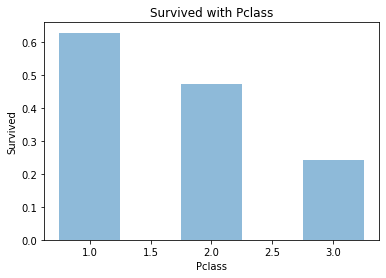

In [78]:
df_ps['Pclass']

plt.bar(df_ps['Pclass'], df_ps['Survived'], alpha = 0.5, width = 0.5)
plt.title('Survived with Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

### train data에서 Sex에 따른 생존율 비교 및 데이터시각화

In [79]:
df_ss = df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
df_ss
#여성의 생존율이 남성보다 높음

,Sex,Survived
0,female,0.742038
1,male,0.188908


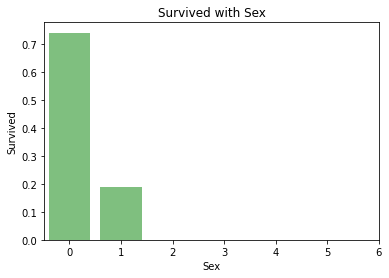

In [80]:
plt.bar(df_ss['Sex'], df_ss['Survived'], color = 'green', alpha = 0.5)
plt.title('Survived with Sex')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.xticks(index, label)
plt.show()

### train data에서 동승자(형제, 배우자) 수에 따른 생존율 비교

In [81]:
df_sib_sur = df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by = 'SibSp', ascending = True)
df_sib_sur
#동행인이 많을 수록 생존율 낮음

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


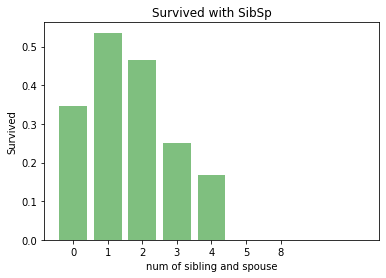

In [82]:
label = df_sib_sur['SibSp']
index = np.arange(len(label))

plt.bar(df_sib_sur['SibSp'], df_sib_sur['Survived'], color = 'green', alpha = 0.5)
plt.title('Survived with SibSp')
plt.xlabel('num of sibling and spouse')
plt.ylabel('Survived')
plt.xticks(index, label)
plt.show()

### train data에서 동승자(부모, 자식) 수에 따른 생존율 비교

In [83]:
df_par_sur = df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by = 'Parch')
df_par_sur
#동행인이 많은 경우 생존율이 낮음(3까지는 생존율이 높은 경향을 보임)

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


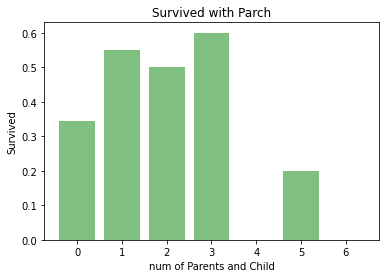

In [84]:
label = df_par_sur['Parch']
index = np.arange(len(label))

plt.bar(df_par_sur['Parch'], df_par_sur['Survived'], color = 'green', alpha = 0.5)
plt.title('Survived with Parch')
plt.xlabel('num of Parents and Child')
plt.ylabel('Survived')
plt.xticks(index, label)
plt.show()

### train data에서 연령대에 따른 생존율

In [135]:
df_age_sur = df_train[['Age', 'Survived']].groupby(['Age'], as_index = False).mean().sort_values(by = 'Age')
df_age_sur

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


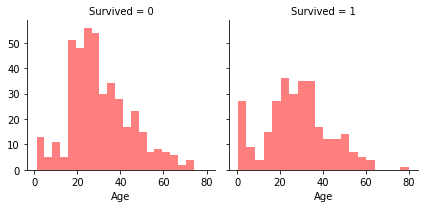

In [136]:
# FacetGrid를 통한 생존 여부로 두개의 그래프 그리기

# 생존여부를 col로 나눈다
grid = sns.FacetGrid(df_train, col = 'Survived')

# 연령대가 다양하므로 히스토그램을 이용해서 시각화 진행
# bin은 30으로 지정
grid.map(plt.hist, 'Age', bins=20, color = 'red', alpha = 0.5)


 - 10세 이하의 영유아의 경우 생존자 수가 사망자 수보다 많다

### train data에서 Pclass와 Survived에 따른 연령 분포

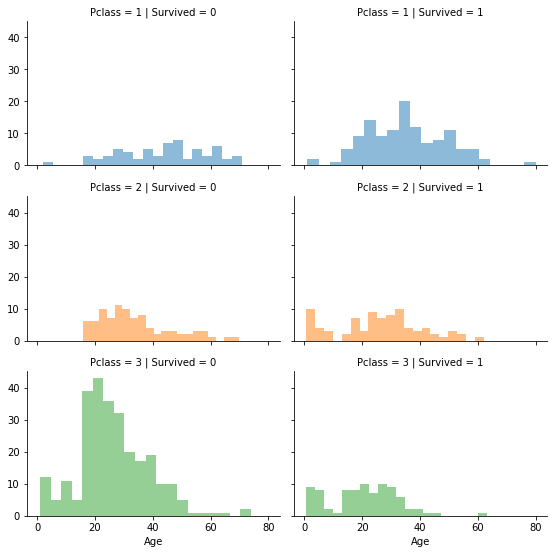

In [137]:
grid = sns.FacetGrid(df_train, col = 'Survived', row = 'Pclass', hue = 'Pclass', height = 2.6, aspect = 1.5)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)

### train data에서 Embarked와 Sex에 따른 생존자 수

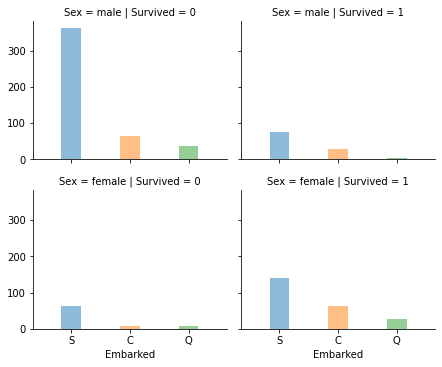

In [138]:
grid = sns.FacetGrid(df_train, col = 'Survived', row = 'Sex', hue = 'Embarked', height=2.6, aspect=1.2)
grid.map(plt.hist, 'Embarked', bins = 3, alpha = 0.5)

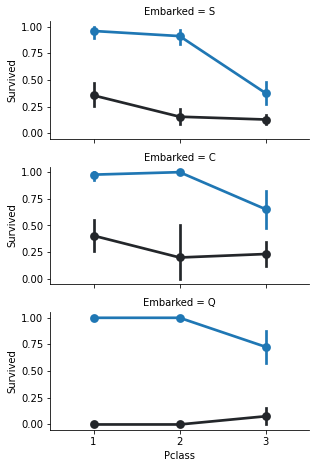

In [139]:
grid = sns.FacetGrid(df_train, row = 'Embarked', height = 2.2, aspect = 2)

#grid.map(그래프형태, x축, y축, 색상, x축 순서, 색상순서)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order = [1,2,3],  hue_order = ['male', 'female'] )

### train set에서 Embarked, Survived, Sex에 따른 Fare 비교

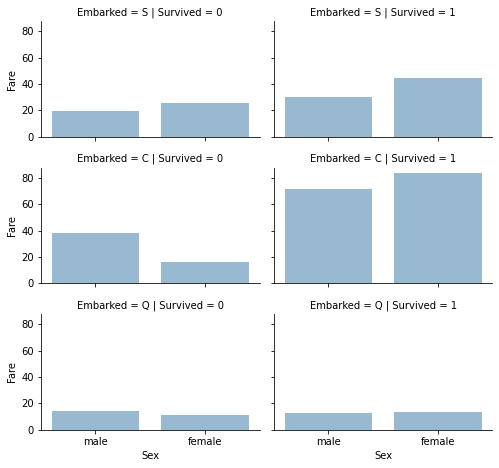

In [140]:
grid = sns.FacetGrid(df_train, row = 'Embarked', col = 'Survived', height = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha = 0.5, order = ['male', 'female'], ci=None) #ci=None을 하지 않으면 

## 데이터 전처리

 - 미사용 변수 제거 : Ticket, Cabin >> 모두가 고유값이므로 분석에 필요하지 않음

In [141]:
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


In [142]:
df_train = df_train.drop(['Ticket', 'Cabin'], axis = 1) #drop(axix=1) >> 열 삭제 
df_test = df_test.drop(['Ticket', 'Cabin'], axis = 1)

print(df_train.shape, df_test.shape)

(891, 10) (418, 9)


 - Name을 통해 기/비혼 분류 및 계급 분류

In [143]:
total = [df_train, df_test]

In [144]:
for dataset in total:
    dataset['Title'] = dataset.Name.str.extract('([a-zA-Z]+)\.', expand = False)
    
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [145]:
for dataset in total:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Major', 'Rev', 'Sir'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms','Lady'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,186,0
Mr,0,517
Mrs,126,0
Rare,2,20


In [146]:
df_train[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.318182


 - 여성의 경우 70% 이상의 생존율을 보였으며
 - 남성의 경우 대체적으로 낮은 생존율을 보였으나, 신분이 높은 Master의 경우 생존율이 남성들 중에는 비교적 높은 편이었다
 

In [200]:
df_train['Title'] = df_train['Title'].apply(lambda x : 1 if (x == 'Rare') else 2 if (x == 'Mr') else 3 if (x == 'Master') else 4 if (x == 'Mrs') else 5 if (x == 'Miss') else 0)
df_test['Title'] = df_test['Title'].apply(lambda x : 1 if (x == 'Rare') else 2 if (x == 'Mr') else 3 if (x == 'Master') else 4 if (x == 'Mrs') else 5 if (x == 'Miss') else 0)

In [193]:
df_train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,1,2,0,0,0,0
1,1,1,0,3,3,1,0,0
2,1,3,0,2,1,0,0,1
3,1,1,0,3,3,0,0,0
4,0,3,1,3,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,2,1,2,1,0,0,1
887,1,1,0,1,2,0,0,1
888,0,3,0,2,2,0,0,0
889,1,1,1,2,2,1,0,1


### Name, PassengerId 열 삭제

In [149]:
df_train = df_train.drop(['Name', 'PassengerId'], axis=1)
df_test = df_test.drop(['Name', 'PassengerId'], axis=1)
total = [df_train, df_test]

print(df_train.shape, df_test.shape)

(891, 9) (418, 8)


In [150]:
for dataset in total:
    dataset['Sex'] = dataset['Sex'].map({'female' : 0, 'male' : 1}).astype(int)
    

In [151]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,2
1,1,1,0,38.0,1,0,71.2833,C,3
2,1,3,0,26.0,0,0,7.9250,S,4
3,1,1,0,35.0,1,0,53.1000,S,3
4,0,3,1,35.0,0,0,8.0500,S,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,5
887,1,1,0,19.0,0,0,30.0000,S,4
888,0,3,0,NaN,1,2,23.4500,S,4
889,1,1,1,26.0,0,0,30.0000,C,2


### Age 결측치 대체를 위한 코드 작성

In [152]:
df_train[( df_train['Age'].isnull())]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
5,0,3,1,NaN,0,0,8.4583,Q,2
17,1,2,1,NaN,0,0,13.0000,S,2
19,1,3,0,NaN,0,0,7.2250,C,3
26,0,3,1,NaN,0,0,7.2250,C,2
28,1,3,0,NaN,0,0,7.8792,Q,4
...,...,...,...,...,...,...,...,...,...
859,0,3,1,NaN,0,0,7.2292,C,2
863,0,3,0,NaN,8,2,69.5500,S,4
868,0,3,1,NaN,0,0,9.5000,S,2
878,0,3,1,NaN,0,0,7.8958,S,2


 - Fare에 영향을 미치는 요인 : Embarked, Sex, Age, Pclass 
     - Embarked : Q < S < C
     - Sex : male < female

In [155]:
guess_age = np.zeros((2,3))

for dataset in total:
    for i in range(0,2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            age_guess = guess_df.median()
            
            guess_age[i, j] = int(age_guess / 0.5 + 0.5) * 0.5
    
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_age[i,j]
        
    dataset['Age'].astype(int)


In [156]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [157]:
for dataset in total:
    dataset.loc[ dataset['Age'] < 10, 'Age'] = 0
    dataset.loc[ (dataset['Age'] >= 10) & (dataset['Age'] < 20), 'Age'] = 1
    dataset.loc[ (dataset['Age'] >= 20) & (dataset['Age'] < 30), 'Age'] = 2
    dataset.loc[ (dataset['Age'] >= 30) & (dataset['Age'] < 40), 'Age'] = 3
    dataset.loc[ (dataset['Age'] >= 40) & (dataset['Age'] < 50), 'Age'] = 4
    dataset.loc[ (dataset['Age'] >= 50) & (dataset['Age'] < 60), 'Age'] = 5
    dataset.loc[ (dataset['Age'] >= 60) & (dataset['Age'] < 70), 'Age'] = 6
    dataset.loc[ (dataset['Age'] >= 70) & (dataset['Age'] < 80), 'Age'] = 7
    dataset.loc[ (dataset['Age'] >= 80), 'Age'] = 8


In [158]:
df_train['Age'] = df_train['Age'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)

In [159]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,2,1,0,7.2500,S,2
1,1,1,0,3,1,0,71.2833,C,3
2,1,3,0,2,0,0,7.9250,S,4
3,1,1,0,3,1,0,53.1000,S,3
4,0,3,1,3,0,0,8.0500,S,2


### SibSp 와 Parch를 통해 가족 동반 여부를 알 수 있는 새로운 변수 WithFamily로 변환

In [160]:
for dataset in total:
    dataset['WithFamily'] = dataset['SibSp'] + dataset['Parch'] + 1

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,WithFamily
0,0,3,1,2,1,0,7.2500,S,2,2
1,1,1,0,3,1,0,71.2833,C,3,2
2,1,3,0,2,0,0,7.9250,S,4,1
3,1,1,0,3,1,0,53.1000,S,3,2
4,0,3,1,3,0,0,8.0500,S,2,1


### WithFamily 변수를 통해 혼자 왔는지 가족과 왔는지를 판단하는 변수인 Alone 변수 생성

In [161]:
for dataset in total:
    dataset['Alone'] = dataset['WithFamily'].apply(lambda x : 1 if x == 1 else 0)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,WithFamily,Alone
0,0,3,1,2,1,0,7.2500,S,2,2,0
1,1,1,0,3,1,0,71.2833,C,3,2,0
2,1,3,0,2,0,0,7.9250,S,4,1,1
3,1,1,0,3,1,0,53.1000,S,3,2,0
4,0,3,1,3,0,0,8.0500,S,2,1,1


### Sibsp, Parch, Withfamily 변수 삭제


In [162]:
df_train = df_train.drop(['Parch', 'SibSp', 'WithFamily'], axis = 1)
df_test = df_test.drop(['Parch', 'SibSp', 'WithFamily'], axis = 1)

total = [df_train, df_test]

df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,1,2,7.2500,S,2,0
1,1,1,0,3,71.2833,C,3,0
2,1,3,0,2,7.9250,S,4,1
3,1,1,0,3,53.1000,S,3,0
4,0,3,1,3,8.0500,S,2,1


### Embarked의 결측치 처리 >> 최빈값으로 대체

In [163]:
freq = df_train.Embarked.dropna().mode()[0]
freq

'S'

In [164]:
for dataset in total:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq)

In [165]:
df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [166]:
for dataset in total:
    dataset['Embarked'] = dataset['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)

df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,1,2,7.2500,0,2,0
1,1,1,0,3,71.2833,1,3,0
2,1,3,0,2,7.9250,0,4,1
3,1,1,0,3,53.1000,0,3,0
4,0,3,1,3,8.0500,0,2,1


### df_test의 Fare결측치 처리 >> 중앙값으로 대체

In [167]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        1
Embarked    0
Title       0
Alone       0
dtype: int64

In [168]:
df_test['Fare'].fillna(df_test['Fare'].dropna().median(), inplace = True)
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Title       0
Alone       0
dtype: int64

In [169]:
print(len(df_test['Fare'].unique()))
df_test['Fare'].unique(), df_test['Fare'].mean(), df_test['Fare'].median()

169


(array([  7.8292,   7.    ,   9.6875,   8.6625,  12.2875,   9.225 ,
          7.6292,  29.    ,   7.2292,  24.15  ,   7.8958,  26.    ,
         82.2667,  61.175 ,  27.7208,  12.35  ,   7.225 ,   7.925 ,
         59.4   ,   3.1708,  31.6833,  61.3792, 262.375 ,  14.5   ,
         61.9792,  30.5   ,  21.6792,  31.5   ,  20.575 ,  23.45  ,
         57.75  ,   8.05  ,   9.5   ,  56.4958,  13.4167,  26.55  ,
          7.85  ,  13.    ,  52.5542,  29.7   ,   7.75  ,  76.2917,
         15.9   ,  60.    ,  15.0333,  23.    , 263.    ,  15.5792,
         29.125 ,   7.65  ,  16.1   ,  13.5   ,   7.725 ,  21.    ,
          7.8792,  42.4   ,  28.5375, 211.5   ,  25.7   ,  15.2458,
        221.7792,  10.7083,  14.4542,  13.9   ,   7.775 ,  52.    ,
          7.7958,  78.85  ,   7.8542,  55.4417,   8.5167,  22.525 ,
          7.8208,   8.7125,  15.0458,   7.7792,  31.6792,   7.2833,
          6.4375,  16.7   ,  75.2417,  15.75  ,   7.25  ,  23.25  ,
         28.5   ,  25.4667,  46.9   , 151.55  , 

In [170]:
df_train['FareBand'] = pd.qcut(df_train['Fare'], 4)
df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [171]:
for dataset in total:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[ (dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[ (dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[ (dataset['Fare'] > 31.0) & (dataset['Fare'] <= 512.329), 'Fare'] = 3



In [172]:
df_train['Fare'] = df_train['Fare'].astype(int)
df_train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone,FareBand
0,0,3,1,2,0,0,2,0,"(-0.001, 7.91]"
1,1,1,0,3,3,1,3,0,"(31.0, 512.329]"
2,1,3,0,2,1,0,4,1,"(7.91, 14.454]"
3,1,1,0,3,3,0,3,0,"(31.0, 512.329]"
4,0,3,1,3,1,0,2,1,"(7.91, 14.454]"
...,...,...,...,...,...,...,...,...,...
886,0,2,1,2,1,0,5,1,"(7.91, 14.454]"
887,1,1,0,1,2,0,4,1,"(14.454, 31.0]"
888,0,3,0,2,2,0,4,0,"(14.454, 31.0]"
889,1,1,1,2,2,1,2,1,"(14.454, 31.0]"


In [173]:
df_train.drop(['FareBand'], axis=1, inplace = True)
df_train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,0,3,1,2,0,0,2,0
1,1,1,0,3,3,1,3,0
2,1,3,0,2,1,0,4,1
3,1,1,0,3,3,0,3,0
4,0,3,1,3,1,0,2,1
...,...,...,...,...,...,...,...,...
886,0,2,1,2,1,0,5,1
887,1,1,0,1,2,0,4,1
888,0,3,0,2,2,0,4,0
889,1,1,1,2,2,1,2,1


In [174]:
df_test['Fare'] = df_test['Fare'].astype(int)

df_test

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
0,3,1,3,0,2,2,1
1,3,0,4,0,0,3,0
2,2,1,6,1,2,2,1
3,3,1,2,1,0,2,1
4,3,0,2,1,0,3,0
...,...,...,...,...,...,...,...
413,3,1,2,1,0,2,1
414,1,0,3,3,1,0,1
415,3,1,3,0,0,2,1
416,3,1,2,1,0,2,1


## 데이터 준비

In [201]:
#목적 변수 제거
X_train = df_train.drop('Survived', axis = 1)
Y_train = df_train['Survived']
X_test = df_test.copy()

X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [202]:
# 머신러닝

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

#### Logistic Regression
 - 종속변수와 독립변수간의 관계를 구체적 함수로 나타내어 향후 예측 모델에 사용
 - 종속변수가 범주형 데이터를 대상으로 하며
 - 입력데이터가 주어졌을 때, 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 classification 기법으로 볼 수도 있다

In [203]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

#Logistic regression의 점수
score = logreg.score(X_train, Y_train)
coef = logreg.coef_
score, coef

(0.7934904601571269,
 array([[-1.15607762, -2.49312165, -0.31039029,  0.01226331,  0.28083046,
          0.        ,  0.03087905]]))

In [204]:
#각 독립변수들의 상관도
coef_df = pd.DataFrame(df_train.columns.delete(0)) #df_train에서 Survived(0번 컬럼) 삭제 후 데이터 프레임으로 생성
coef_df.columns = ['Feature'] #coef_df의 컬럼명을 Feature로 변경
coef_df['Correlation'] = pd.Series(coef[0])


In [205]:
coef_df.sort_values(by = 'Correlation', ascending=False)

,Feature,Correlation
4,Embarked,0.280830
6,Alone,0.030879
3,Fare,0.012263
5,Title,0.000000
2,Age,-0.310390
0,Pclass,-1.156078
1,Sex,-2.493122


 - 결과 해석
     - logstic regression의 점수 : 0.79
     
     - 승선지(Embarked)가 Southampton(0) > C(1) > Queenstown(2)으로 갈수록 생존율이 높아졌으면 상관도는 0.28로 양의 상관관계를 보임
     - 동승자여부(Alone)과 승선요금(Fare)는 상관관계가 비교적 약함
     - 나이(Age)가 증가할 수록 생존율은 감소하는 경향을 보임
     - 객실등급(Pcalss)가 낮아질수록 생존율은 감소하는 경향이 뚜렷
     - 성별(Sex) : 1(남성)일 때 생존율은 감소하는 것이 뚜렷함
     

#### Support Vector Machine

In [206]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = svc.score(X_train, Y_train)

acc_svc

0.6430976430976431

#### K Nearest Neighborhood

In [213]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = knn.score(X_train, Y_train)

acc_knn

0.8237934904601572

#### Gaussian Naive Bayes

In [214]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
acc_gnb = gnb.score(X_train, Y_train)
acc_gnb

0.7160493827160493

#### Perceptron

In [215]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_per = perceptron.score(X_train, Y_train)
acc_per

0.7160493827160493

#### Linear SVC

In [216]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linsvc = linear_svc.score(X_train, Y_train)
acc_linsvc

/home/kdata/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7957351290684624

#### Decision Tree

In [217]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_train, Y_train)
acc_decision_tree

0.8720538720538721

#### Random Forest

In [218]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = random_forest.score(X_train, Y_train)
acc_random_forest

0.8720538720538721

In [219]:
models = pd.DataFrame({
    'Model name' : ['Logistic Regression', 'Suport Vector Machine', 'K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Linear SVC', 'Perceptron', 'Decision Tree', 'Random Forest'],
    'Score' : [score, acc_svc, acc_knn, acc_gnb, acc_linsvc, acc_per, acc_decision_tree, acc_random_forest]
})

models

,Model name,Score
0,Logistic Regression,0.793490
1,Suport Vector Machine,0.643098
2,K-Nearest Neighbor,0.823793
3,Gaussian Naive Bayes,0.716049
4,Linear SVC,0.795735
5,Perceptron,0.716049
6,Decision Tree,0.872054
7,Random Forest,0.872054
